**Resolvedor Problema do Transporte**

Custo total: 434.0
origem : destino : quantidade
0 : 0 : 0
0 : 1 : 3
0 : 2 : 16
0 : 3 : 0
0 : 4 : 0
0 : 5 : 0
0 : 6 : 0
1 : 0 : 23
1 : 1 : 0
1 : 2 : 0
1 : 3 : 0
1 : 4 : 0
1 : 5 : 2
1 : 6 : 0
2 : 0 : 0
2 : 1 : 0
2 : 2 : 0
2 : 3 : 6
2 : 4 : 0
2 : 5 : 7
2 : 6 : 0
3 : 0 : 0
3 : 1 : 7
3 : 2 : 0
3 : 3 : 0
3 : 4 : 16
3 : 5 : 0
3 : 6 : 7
4 : 0 : 0
4 : 1 : 0
4 : 2 : 0
4 : 3 : 14
4 : 4 : 0
4 : 5 : 0
4 : 6 : 3


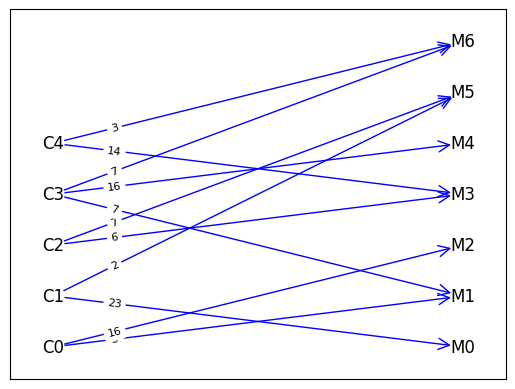

In [2]:
# -*- coding: utf-8 -*-
"""ADMProbTransporte.ipynb

Automatically generated by Colab.

**Resolvedor Problema do Transporte**
"""

from mip import Model, xsum, minimize, INTEGER, CBC, OptimizationStatus
from itertools import product
import matplotlib.pyplot as plt
import networkx as nx
from math import sqrt
import numpy as np
import random

# número de centros e mercados
num_centros = 5
num_mercados = 7

# listas com os índices dos centros e dos mercados
centros = range(num_centros)
mercados = range(num_mercados)

# listas com os valores das restrições de capacidade
#oferta_centros = [15, 25, 10]
#demanda_mercados = [5, 15, 15, 15]

# geração aleatória da lista de ofertas dos centros
ofertas_centros = [random.randint(5, 25) for _ in range(num_centros)]

# geração aleatória da lista de demandas dos mercados
demandas_mercados = [random.randint(5, 25) for _ in range(num_mercados)]

# garantir que a soma das ofertas seja igual à soma das demandas
while sum(ofertas_centros) != sum(demandas_mercados):
    if sum(ofertas_centros) < sum(demandas_mercados):
        ofertas_centros[random.randint(0, num_centros - 1)] += 1
    else:
        demandas_mercados[random.randint(0, num_mercados - 1)] += 1

# inicialização da matriz de custos do transporte
custos_de_transporte = [[random.randint(1, 20) for _ in range(num_mercados)] for _ in range(num_centros)]

# custo de transporte entre centros e mercados
#custos_de_transporte = [[10, 2, 20, 11], [12, 7, 9, 20], [4, 14, 16, 18]]

# lista com os arcos entre centros e mercados
arcos = [(i, j) for (i, j) in product(centros, mercados)]

# declaração do modelo
modelo = Model('Problema do Transporte', solver_name=CBC)

# x_ij igual a 1 se o mercado j é atendido pelo centro i; 0, caso contrário
x = {(i, j): modelo.add_var(lb=0) for (i, j) in arcos}

# função objetivo: minimização do custo de transporte
modelo.objective = minimize(xsum(custos_de_transporte[i][j] * x[i, j] for (i, j) in arcos))

# restrição para os centros (oferta)
for i in centros:
    modelo += xsum(x[ii, j] for (ii, j) in arcos if i == ii) == ofertas_centros[i]

# restrições para os mercados (demanda)
for j in mercados:
    modelo += xsum(x[i, jj] for (i, jj) in arcos if j == jj) == demandas_mercados[j]

# otimização do modelo
status = modelo.optimize()

lista_resultado_tuplas = []

# impressão do resultado
if status == OptimizationStatus.OPTIMAL:
    # imprimir o custo total
    print(f"Custo total: {modelo.objective_value}")

    # imprimir as quantidades de origem para destino
    print("origem : destino : quantidade")
    for i in centros:
        for j in mercados:
            print(f"{i} : {j} : {int(x[i, j].x)}")
            #pegando tuplas e peso
            if int(x[i, j].x) > 0:
              lista_resultado_tuplas.append(('C' + str(i), 'M' + str(j), {'weight': int(x[i, j].x)}))

# Criar um grafo
G = nx.Graph()

#listas dos nós
lista_centros = ['C'+ str(i) for i in range(num_centros)]
lista_mercados = ['M'+ str(i) for i in range(num_mercados)]

# Adicionar nós
G.add_nodes_from(lista_centros + lista_mercados)

# Adicionar arestas
G.add_edges_from(lista_resultado_tuplas)

pos = {}

# Definir posições para os centros (à esquerda)
for i, centro in enumerate(lista_centros):
    pos[centro] = (-1, i)

# Definir posições para os mercados (à direita)
for i, mercado in enumerate(lista_mercados):
    pos[mercado] = (1, i)

# Visualizar o grafo
nx.draw_networkx_edges(G,pos=pos, arrows=True, arrowsize=20, arrowstyle='->', edge_color='blue', width=1)
edge_labels = {(i, j): p['weight'] for i, j, p in lista_resultado_tuplas}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8, label_pos= float (0.85))
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')


plt.show()